In [1]:
import pdb
import pandas as pd
import numpy as np

import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections.abc import Iterable

import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities/')

from utility_functions.utils import *

In [50]:
def read_xrd(file, baseline =False):
    df = pd.read_csv(file, sep = ' ',  names =['theta','counts'],skiprows=1 )    
    start_baseline = getnearpos(df['theta'], 65)
    end_baseline = getnearpos(df['theta'], 87)
    plt.figure()
    plt.plot(df['theta'], df['counts'], label= 'raw data')
    
    if baseline == True:
        m = (df['counts'].iloc[start_baseline]-df['counts'].iloc[end_baseline])/ (df['theta'].iloc[start_baseline]-df['theta'].iloc[end_baseline])
        baseline_corr = m * (df['theta'] - df['theta'].iloc[start_baseline]) +df['counts'].iloc[start_baseline]
        plt.plot(df['theta'], baseline_corr, label = 'baseline')
        df['counts'] = df['counts'] - baseline_corr
    else:
        m=1
        
    counts_max = df['counts'].idxmax()
    
    #df['counts']= df['counts']/df['counts'].iloc[counts_max]*100
    plt.plot(df['theta'], df['counts'], label = 'corrected data')
    
    plt.legend()
    #plt.xlim(10,45)
    return df



def plot_xrd(file, legend, color, shift=0, yshift=0):
    startwave= file['theta'].iloc[-1]
    endwave=file['theta'].iloc[0]
    
    ax.plot(file['theta']+shift, file['counts']+yshift, label = str(legend), color = color)
    #ax.xlim(endwave+60, startwave-60)
    ax.set_xlabel("2theta", fontsize=14)
    ax.set_ylabel("Intensity", fontsize=14)
    
    ax.legend()
    
    return



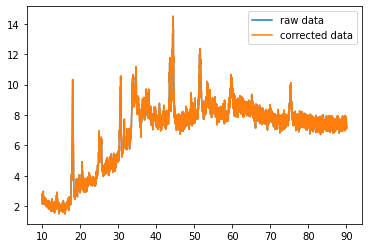

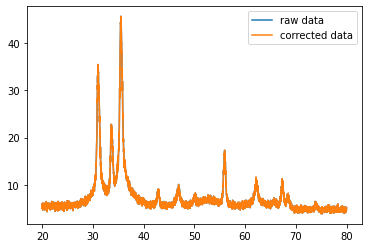

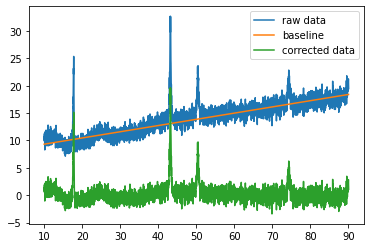

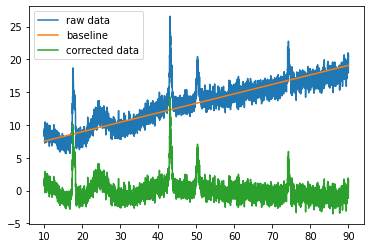

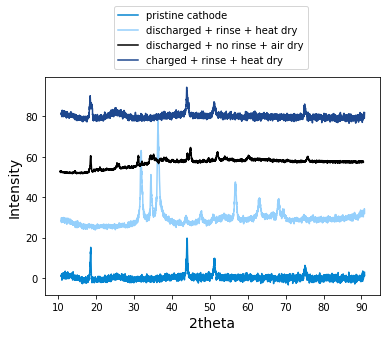

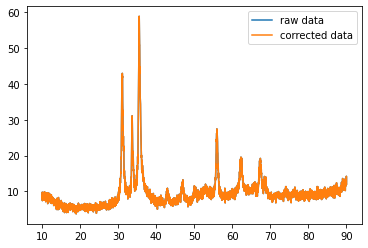

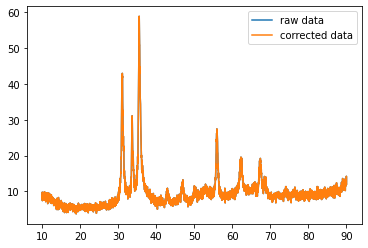

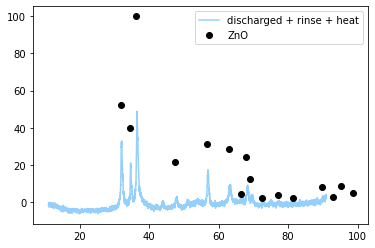

In [51]:
zno_theta = [36.262, 31.773, 34.441, 56.604, 62.889, 67.968, 47.559, 69.097, 95.323, 89.651, 98.672, 66.388, 76.978, 92.811, 81.430, 72.610]
zno_intensity = [117, 61.3, 46.4, 36.8, 33.3, 28.2, 25.4, 14.4, 10.5, 9.59, 5.85, 5.03, 4.44, 3.16, 2.46, 2.34]
zno_intensity_rel = [ i/117*100 for i in zno_intensity]
#zno_intensity_rel = [i-40 for i in zno_intensity_rel]
colors = ['']

discharged_airdry = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211110_Zn_cathode_airdry/211110_2mAh_discharge_xc72_airdry_slowscan2_exported.xy')
dischargedxc72 = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211103_Zn_O2_cathode/EAK_XC72_500uA_long-discharge_slow_exported.xy')
pristinexc72 = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211103_Zn_O2_cathode/EAK_XC72_pristine_exported.xy', baseline=True)
chargedxc72 = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211103_Zn_O2_cathode/EAK_XC72_500uA_charged_exported.xy', baseline=True)
fig, ax = plt.subplots()
colors = ['xkcd:cerulean', 'xkcd:light blue', 'xkcd:cobalt']
fullrange_disch = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211103_Zn_O2_cathode/EAK_XC72_500uA_long-discharge_exported.xy')

#ax.plot(zno_theta, zno_intensity_rel, 'ko', label = 'ZnO')
plot_xrd(pristinexc72, 'pristine cathode', shift = 0.8, color = colors[0])
#plot_xrd(dischargedxc72, 'discharged cathode', shift =0.8, color = colors[1], yshift= 20 )
plot_xrd(fullrange_disch, 'discharged + rinse + heat dry', shift =0.8, color = colors[1], yshift= 20 )
plot_xrd(discharged_airdry, 'discharged + no rinse + air dry', shift =0.5, color = 'k', yshift= 50 )
plot_xrd(chargedxc72, 'charged + rinse + heat dry', shift = 0.8, color = colors[2], yshift = 80)
ax.legend(bbox_to_anchor=(0.8,1.35))

#fig.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211103_Zn_O2_cathode/211103_Zn_discharged_charged_cathode_comparison.png', transparent = True, dpi=600, bbox_inches='tight')


#ax.set_xlim(50, 80)



dischargedxc72_fast = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211103_Zn_O2_cathode/EAK_XC72_500uA_long-discharge_exported.xy')

plt.figure()
plt.plot(dischargedxc72_fast['theta']+1, dischargedxc72_fast['counts']-10, label='discharged + rinse + heat', color=colors[1])
plt.plot(zno_theta, zno_intensity_rel, 'ko', label = 'ZnO')


plt.legend()

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211103_Zn_O2_cathode/211103_ZnO_dischargedcathode_comparison.png', transparent = True, dpi=600, bbox_inches='tight')



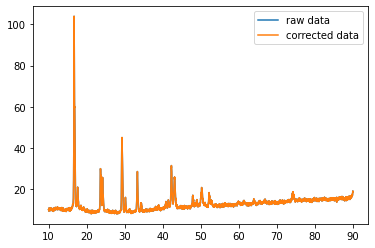

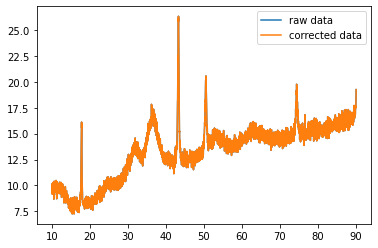

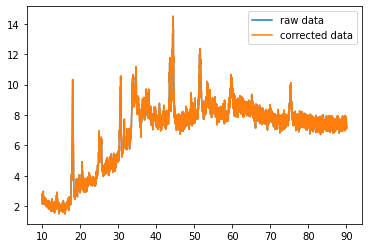

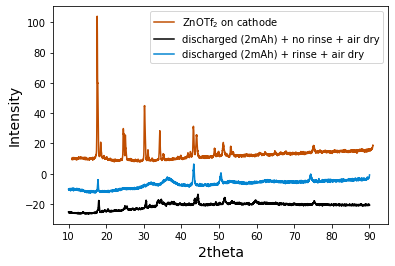

In [43]:
znotf2oncathode = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211116_Zn_xc72/211116_ZNOTf2elyte_pristinecathode_airdry_exported.xy')
rinsed_disch_air = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211116_Zn_xc72/211116_ZnO2_cathode_2mAh_rinse_airdry_exported.xy')
discharged_airdry_norinse = read_xrd('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211110_Zn_cathode_airdry/211110_2mAh_discharge_xc72_airdry_slowscan2_exported.xy')



fig, ax = plt.subplots()
colors = ['xkcd:cerulean', 'xkcd:light blue', 'xkcd:cobalt']
#ax.plot(zno_theta, zno_intensity_rel, 'ko', label = 'ZnO')
plot_xrd(znotf2oncathode, 'ZnOTf$_2$ on cathode', shift= 0.9, color = 'xkcd:burnt orange')
plot_xrd(discharged_airdry, 'discharged (2mAh) + no rinse + air dry', color = 'k', yshift= -28 )
plot_xrd(rinsed_disch_air, 'discharged (2mAh) + rinse + air dry', color = colors[0], yshift= -20 )

#fig.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211116_Zn_xc72/211103_ZnOTf2_cathode_rinsevsnorinse_comparison.png', transparent = True, dpi=600, bbox_inches='tight')


#plt.ylim(-15,40)

#fig.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/XRD/211116_Zn_xc72/211103_ZnOTf2_cathode_comparison_zoomed.png', transparent = True, dpi=600, bbox_inches='tight')


